# **Change point analysis**

In [2]:
!pip install ruptures

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.7 MB/s eta 0:00:00


In [3]:
#change point analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt
import pymc as pm

In [5]:
oil_price = pd.read_csv('/content/drive/MyDrive/change point analysis/data/processed_data.csv')
oil_price.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [11]:
oil_price.shape

(9011, 1)

In [7]:
oil_price['Date'] = pd.to_datetime(oil_price['Date'])
oil_price = oil_price.sort_values(by='Date')
oil_price = oil_price.set_index('Date')

# Preprocess the data
oil_price['Price'] = oil_price['Price'].interpolate()

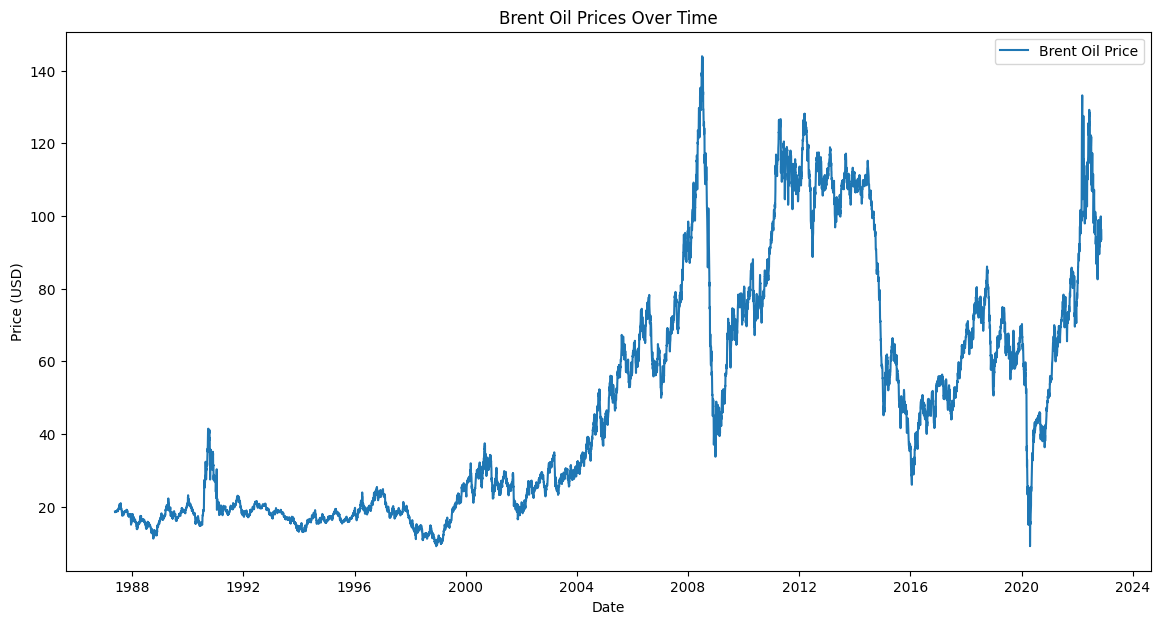

In [8]:
# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(oil_price.index, oil_price['Price'], label='Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Brent Oil Prices Over Time')
plt.legend()
plt.show()

# **Bayesian Methode**

Output()

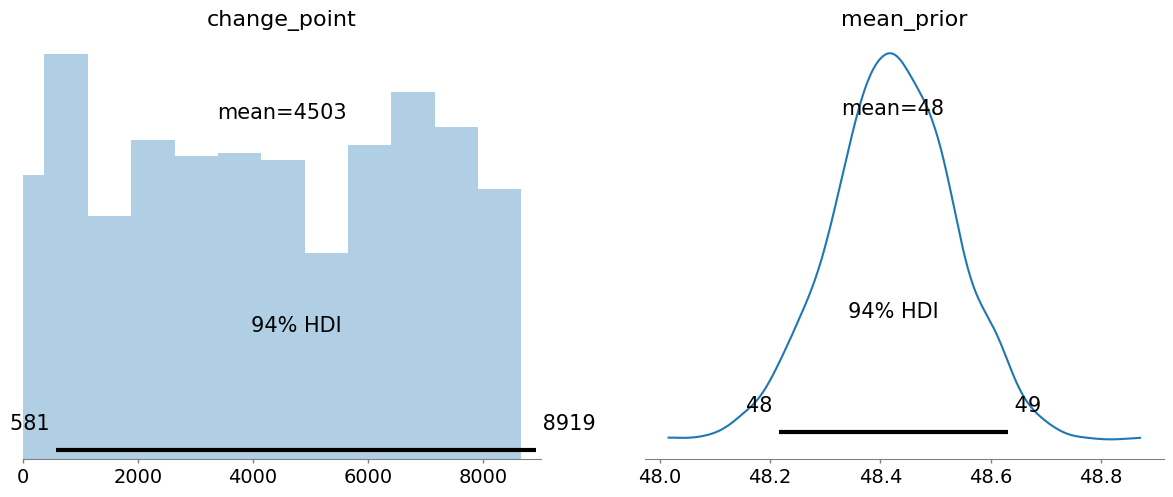

In [9]:
# Bayesian Change Point Detection using PyMC3
with pm.Model() as model:
    # Priors
    mean_price = oil_price['Price'].mean()
    mean_prior = pm.Normal('mean_prior', mu=mean_price, sigma=10)
    change_point = pm.DiscreteUniform('change_point', lower=0, upper=len(oil_price)-1)

    # Likelihood
    likelihood = pm.Normal('likelihood', mu=mean_prior, sigma=10, observed=oil_price['Price'])

    # Inference
    trace = pm.sample(1000, tune=1000, cores=2)

# Plot results
pm.plot_posterior(trace)
plt.show()

# **Ruptures Method**
Each breakpoint represents a period where the price behavior significantly changed.

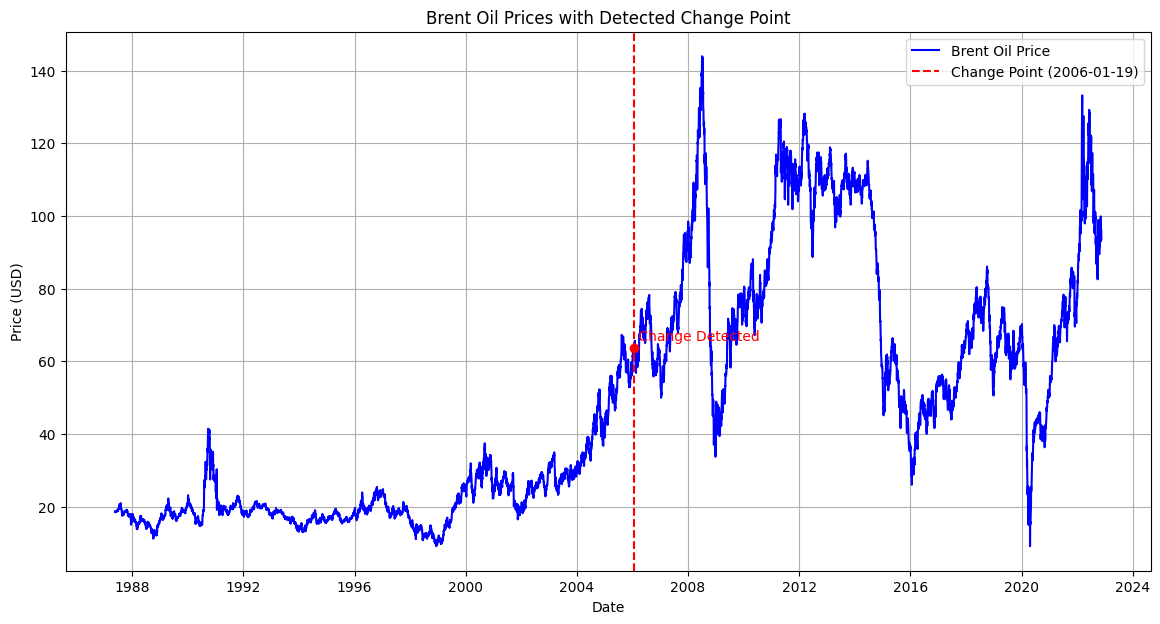

In [12]:
# Validate change point index
change_point_index = 4753
if change_point_index < len(oil_price):
    change_point_date = oil_price.index[change_point_index]  # Get corresponding date

    # Plot the data with change point
    plt.figure(figsize=(14, 7))
    plt.plot(oil_price.index, oil_price['Price'], label='Brent Oil Price', color='blue')

    # Highlight change point
    plt.axvline(x=change_point_date, color='red', linestyle='--', label=f'Change Point ({change_point_date.date()})')

    # Add annotation
    plt.scatter(change_point_date, oil_price.loc[change_point_date, 'Price'], color='red', zorder=3)
    plt.text(change_point_date, oil_price.loc[change_point_date, 'Price'] + 2, " Change Detected", color="red")

    # Labels & title
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title('Brent Oil Prices with Detected Change Point')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print(f"Error: change_point_index ({change_point_index}) is out of range!")


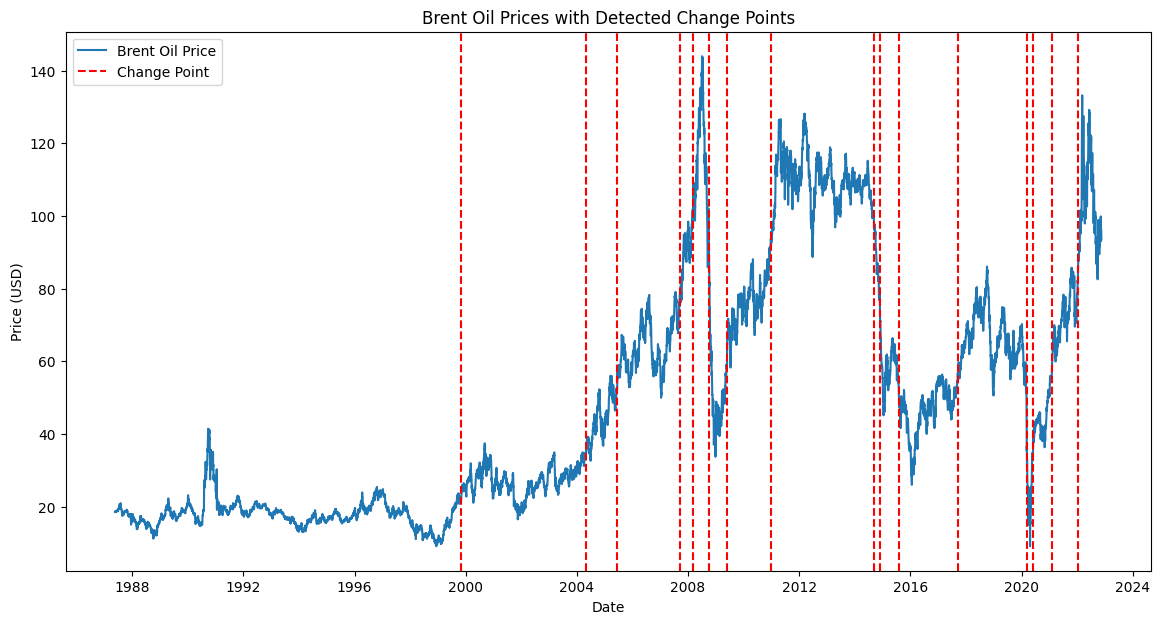

In [13]:
price_array = oil_price['Price'].values
model = "rbf"
algo = rpt.Pelt(model=model).fit(price_array)
change_points = algo.predict(pen=20)

plt.figure(figsize=(14, 7))
plt.plot(oil_price.index, oil_price['Price'], label='Brent Oil Price')
for cp in change_points[:-1]:
    plt.axvline(x=oil_price.index[cp], color='red', linestyle='--', label='Change Point' if cp == change_points[0] else "")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Brent Oil Prices with Detected Change Points')
plt.legend()
plt.show()

Change Point Dates (actual dates): [Timestamp('1999-11-02 00:00:00'), Timestamp('2004-05-04 00:00:00'), Timestamp('2005-06-16 00:00:00'), Timestamp('2007-09-12 00:00:00'), Timestamp('2008-03-06 00:00:00'), Timestamp('2008-10-08 00:00:00'), Timestamp('2009-05-29 00:00:00'), Timestamp('2010-12-21 00:00:00'), Timestamp('2014-09-08 00:00:00'), Timestamp('2014-12-02 00:00:00'), Timestamp('2015-08-04 00:00:00'), Timestamp('2017-09-19 00:00:00'), Timestamp('2020-03-09 00:00:00'), Timestamp('2020-05-29 00:00:00'), Timestamp('2021-02-03 00:00:00'), Timestamp('2022-01-14 00:00:00')]


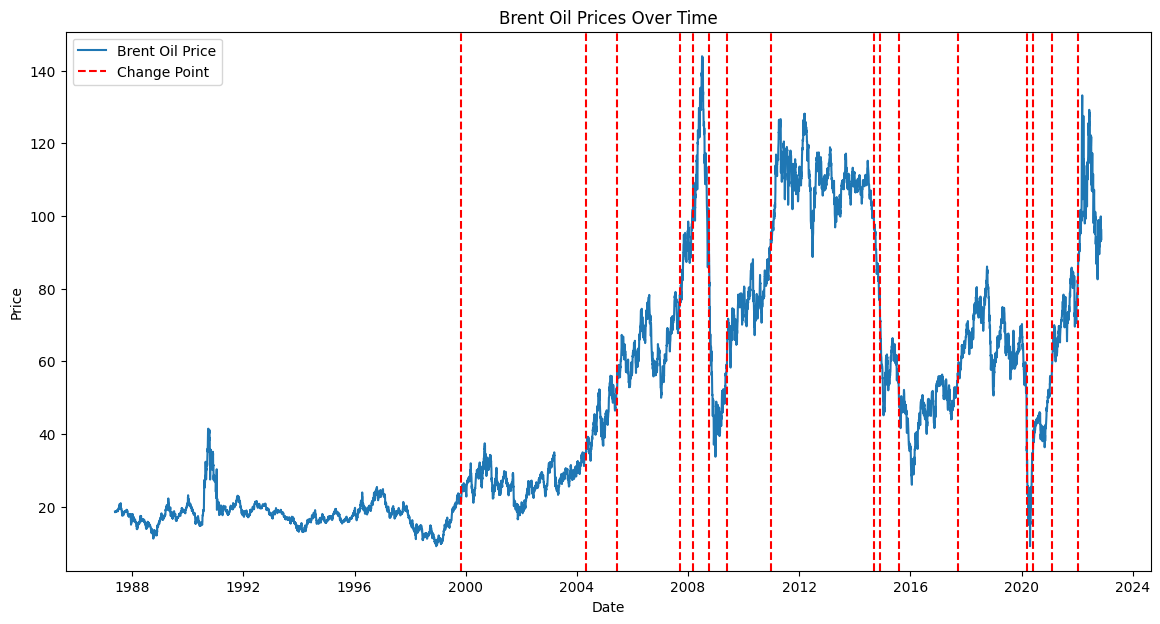

In [16]:
price_array=oil_price['Price'].values
model='rbf'
algo=rpt.Pelt(model=model).fit(price_array)
change_points=algo.predict(pen=20)
#check validity pf change point index
valid_change_points = [i for i in change_points if i < len(oil_price)]
change_point_dates = oil_price.index[valid_change_points].tolist()
print("Change Point Dates (actual dates):", change_point_dates)

plt.figure(figsize=(14,7))
plt.plot(oil_price.index,oil_price['Price'],label='Brent Oil Price')
for cp in change_points[:-1]:
    plt.axvline(x=oil_price.index[cp], color='r',linestyle='--' ,label="Change Point" if cp ==change_points[0] else None)
plt.title("Brent Oil Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()